# Exploratory Analysis of Spotify Audio Features and Track Popularity
**Tools:** Python (pandas, matplotlib), SQL (SQLite)

## Project Objective
The goal of this project is to explore how different audio features of songs
(e.g., energy, danceability, valence, tempo) relate to track popularity on Spotify.
Using exploratory data analysis, SQL-based aggregation, and data visualization,
this analysis aims to uncover patterns that can inform music recommendation and
content strategy decisions.


## Dataset Overview
This dataset contains audio features and popularity metrics for tracks available
on Spotify. Key variables include:
- Popularity score (0–100)
- Audio features such as energy, danceability, valence, tempo, and loudness
- Track-level metadata

The dataset will be used for exploratory analysis and insight generation.


In [3]:
import os
os.getcwd()
os.listdir("..")  # lists everything in the folder above 'notebooks'
os.listdir("../data/raw")




['spotify_tracks.csv']

## 1. Data Loading & Overview

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("../data/raw/spotify_tracks.csv")

In [5]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Data Cleaning
Basic data cleaning was performed to ensure consistency and remove incomplete records.

In [7]:
df = df.dropna(subset=["popularity", "energy", "danceability", "valence"])


### 3. Data overview/ Aggregation using SQL 

In [8]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("tracks", conn, index=False, if_exists="replace")


114000

In [22]:
query_total = "SELECT COUNT(*) AS total_tracks FROM tracks;"
total_tracks = pd.read_sql_query(query_total, conn)
print(total_tracks)


   total_tracks
0        114000


In [23]:
query_avg = """
SELECT 
    ROUND(AVG(energy),2) AS avg_energy,
    ROUND(AVG(danceability),2) AS avg_danceability,
    ROUND(AVG(valence),2) AS avg_valence,
    ROUND(AVG(tempo),2) AS avg_tempo
FROM tracks;
"""

avg_features = pd.read_sql_query(query_avg, conn)
print(avg_features)


   avg_energy  avg_danceability  avg_valence  avg_tempo
0        0.64              0.57         0.47     122.15


Before exploring relationships between audio features and track popularity, we first aggregated the dataset to understand overall distributions. SQL was used to compute total tracks and averages of the different features. 

### Analysis 1: Energy vs Popularity
This analysis explores whether higher-energy tracks tend to have higher average popularity.


In [9]:
query = """
SELECT
  ROUND(energy, 2) AS energy_level,
  AVG(popularity) AS avg_popularity,
  COUNT(*) AS track_count
FROM tracks
GROUP BY energy_level
HAVING track_count > 50
ORDER BY energy_level;
"""

energy_popularity = pd.read_sql(query, conn)
energy_popularity.head()


,energy_level,avg_popularity,track_count
0,0.00,36.533808,281
1,0.01,33.810959,365
2,0.02,34.064286,280
3,0.03,31.623978,367
4,0.04,29.762195,328


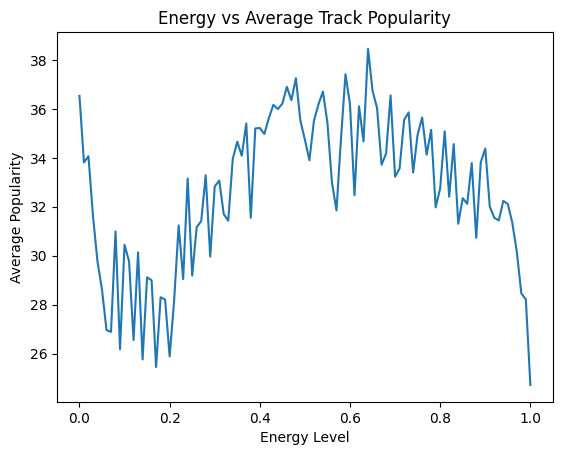

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    energy_popularity["energy_level"],
    energy_popularity["avg_popularity"]
)
plt.xlabel("Energy Level")
plt.ylabel("Average Popularity")
plt.title("Energy vs Average Track Popularity")
plt.show()


### Insight
Initial line visualization suggested a positive relationship between energy and popularity. However, because line plots imply continuity and may exaggerate trends in non-sequential data, I used a correlation heat map to more rigorously evaluate relationships between the different audio features and popularity.


### Analysis 2: Audio Features Correlation Heat Map


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
features = [
    'energy',
    'danceability',
    'valence',
    'tempo',
    'loudness',
    'acousticness',
    'popularity'
]

corr_df = df[features]

In [14]:
corr_matrix = corr_df.corr()

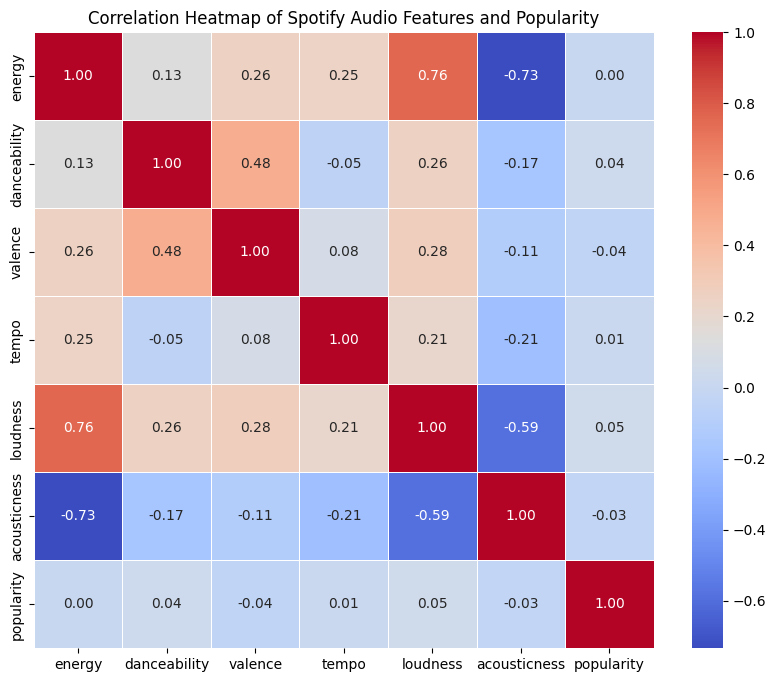

In [15]:
plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    annot=True,        # shows correlation numbers
    cmap='coolwarm',   # red/blue gradient
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Spotify Audio Features and Popularity")
plt.show()


### Insights
Correlation analysis indicates that none of the audio features strongly predict track popularity. Loudness and Danceability show the highest, though still minimal, correlations (r = 0.05 and r = 0.04, respectively), suggesting that these factors have only a very small association with popularity.

These results suggest that popularity is likely influenced more by external factors, such as marketing, playlist placement, or artist recognition, rather than the intrinsic audio characteristics of tracks.

While audio features alone are weak predictors, segmenting tracks by energy, danceability, or valence may still be useful in exploring listener preferences or for exploratory feature engineering in future predictive models.

### Future implications 
Further analysis could incorporate additional data, such as user engagement, playlist exposure, or artist popularity, to better understand the drivers of track success. Additionally, interactions between audio features might reveal subtle patterns not captured by simple correlations.

### Scatter Plots 
Lets drill down on the "most correlated" audio features: Loudness and Danceability, to further explore their relationship with popularity. 

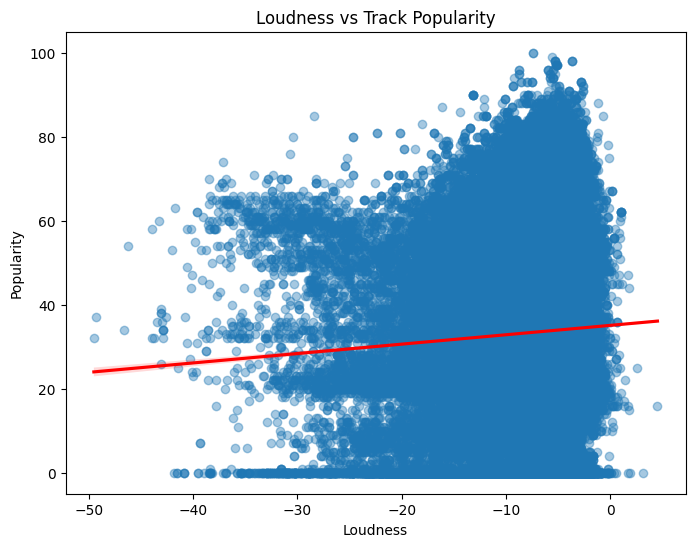

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x='loudness',
    y='popularity',
    scatter_kws={'alpha':0.4},  # makes points slightly transparent
    line_kws={'color':'red'}
)

plt.title("Loudness vs Track Popularity")
plt.xlabel("Loudness")
plt.ylabel("Popularity")
plt.show()


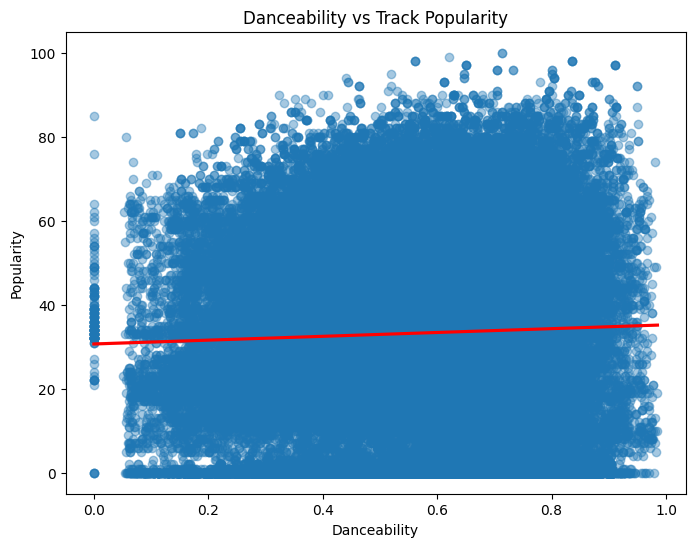

In [26]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x='danceability',
    y='popularity',
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)

plt.title("Danceability vs Track Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()


### Insights 
While the correlation heatmap indicates minimal linear relationships between audio features and popularity, scatter plots were used to visually inspect the distribution and dispersion of the features with the highest relative correlation.

The regression line confirms a near-flat trend, reinforcing that Loudness and danceability alone, are not strong predictors of popularity.

### Conclusion & Next Steps
This analysis explored whether intrinsic audio features — including energy, danceability, valence, tempo, and loudness — are associated with track popularity. Correlation analysis and scatter plots indicate that none of the features exhibit a strong linear relationship with popularity. While danceability and loudness show the highest relative correlations (r ≈ 0.05 and r ≈ 0.04), these relationships are minimal and unlikely to meaningfully predict commercial success on their own.

These findings suggest that audio characteristics alone are insufficient to explain variations in track popularity. Instead, popularity likely depends more heavily on external and contextual factors such as artist reputation, marketing efforts, playlist placement, social media exposure, and listener behavior.

Overall, this analysis demonstrates that while exploratory feature analysis is useful for understanding data structure, predictive modeling of music success requires a broader set of variables beyond intrinsic song attributes.

To deepen this analysis and better understand the drivers of track popularity, future work could include:

- Incorporating external variables such as artist popularity, playlist placement, release year, or streaming platform engagement metrics.

- Exploring interaction effects between features (e.g., high energy combined with high danceability).

- Testing non-linear models or classification approaches (e.g., predicting whether a track falls in the top 25% of popularity).

- Applying machine learning models to evaluate whether combinations of features improve predictive performance compared to individual correlations.

Expanding the dataset to include behavioral or marketing-related features would likely provide stronger predictive power and yield more actionable business insights.